In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,f1_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from google.colab.patches import cv2_imshow

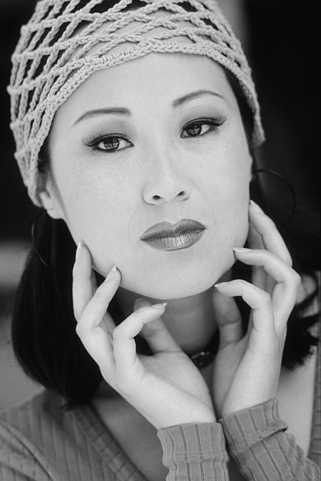

In [ ]:
img = cv2.imread("302003.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# mg = cv2.imread("images/22090.jpg")
# image = rgb2lab(img)
# image[...,1] = image[...,2] = 0
# image = lab2rgb(image)
# org_data = np.asarray(image)
# print(org_data.shape)
# mod_data = np.reshape(org_data,(-1,3))
# print(mod_data.shape)

org_data = np.asarray(gray)
# print(org_data.shape)
mod_data = np.reshape(org_data,(-1,1))
# print(mod_data.shape)
cv2_imshow(gray)


In [ ]:
%%timeit -n5 -r5
gmm = GMM(n_components = 6,covariance_type = "tied")
gmm.fit(mod_data)
gmm_labels = gmm.predict(mod_data)
gmm_segmented = gmm_labels.reshape(org_data.shape[0],org_data.shape[1])
# cv2.imshow('Grayscale', gmm_segmented)
# cv2_imshow (gray)
# cv2.waitKey(0)
 
# # Window shown waits for any key pressing event
# cv2.destroyAllWindows()
# cv2.waitKey(0) 
 
# Window shown waits for any key pressing event
# cv2.destroyAllWindows()
# %%timeit -n5 -r5
# kmeans = KMeans(n_clusters = 6)
# kmeans.fit(mod_data)
# kmeans_labels = kmeans.predict(mod_data)
# kmeans_segmented = kmeans_labels.reshape(org_data.shape[0], org_data.shape[1])


992 ms ± 116 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


In [ ]:
%%timeit -n5 -r5
# DBSCAN
# dbscan = 
some = DBSCAN(eps = 0.0375, min_samples = 50).fit(mod_data)
dbscan_labels = some.labels_
dbscan_segmented = dbscan_labels.reshape(org_data.shape[0], org_data.shape[1])
# plt.imshow(dbscan_segmented)
# plt.show()




2.81 s ± 91.9 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


In [ ]:
!pip install fuzzy-c-means
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
%%timeit -n5 -r5
# Fuzzy KMeans
from fcmeans import FCM
fcm_model = FCM(n_clusters=6) 
fcm_model.fit(mod_data)
fcm_model_labels = fcm_model.predict(mod_data)
fcm_segmented = fcm_model_labels.reshape(org_data.shape[0], org_data.shape[1])
# plt.imshow(fcm_segmented)
# plt.show()
 

14.8 s ± 83.2 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


In [ ]:
# initializing matrices
Sigma1=np.array([[1,0.9],[0.9,1]])
Sigma1

array([[1. , 0.9],
       [0.9, 1. ]])

In [ ]:
# image = cv2.imread('22090.jpg')
# cv2.imshow('Original', image)
# cv2.waitKey(0)
 
# # Use the cvtColor() function to grayscale the image
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# cv2.imshow('Grayscale', gray_image)
# cv2.waitKey(0) 
 
# # Window shown waits for any key pressing event
# cv2.destroyAllWindows()
%%timeit -n5  -r5
kmeans = KMeans(n_clusters = 6)
kmeans.fit(mod_data)
kmeans_labels = kmeans.predict(mod_data)
kmeans_segmented = kmeans_labels.reshape(org_data.shape[0], org_data.shape[1])


1.09 s ± 32.7 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)
